Exercise 01:

(8, 8)


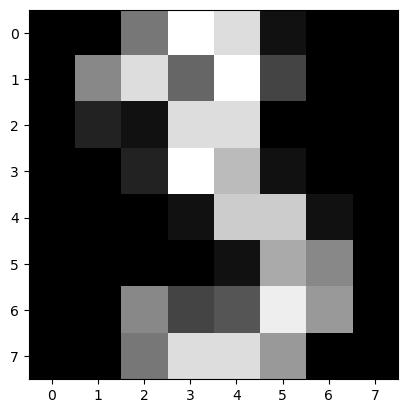

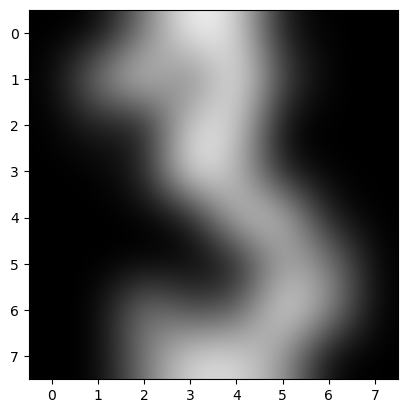

In [7]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

digits = load_digits()
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

print(np.shape(images[0]))
#The images are of size 8x8

#Interpolate using nearest neighbor
img_nearest = images[3]
assert 2 == len (img_nearest.shape)
plt.figure()
plt.gray()
plt.imshow(img_nearest,interpolation = "nearest" ) # also try interpolation =" bicubic "
plt.show()

#Interpolate using bicubic
img_bicubic = images[3]
assert 2 == len (img_bicubic.shape)
plt.figure()
plt.gray()
plt.imshow(img_bicubic,interpolation = "bicubic" ) # also try interpolation =" bicubic "
plt.show()

x_3and9 = []
y_3and9 = []
image_3and9 = []
for i in range(len(data)):
    if target[i] == 3 or target[i] == 9:
        x_3and9.append(data[i])
        y_3and9.append(target[i]) 
        image_3and9.append(images[i])

X_train, X_test, y_train, y_test =\
    model_selection.train_test_split(x_3and9, y_3and9, test_size = 0.4, random_state = 0)


Exercise 02

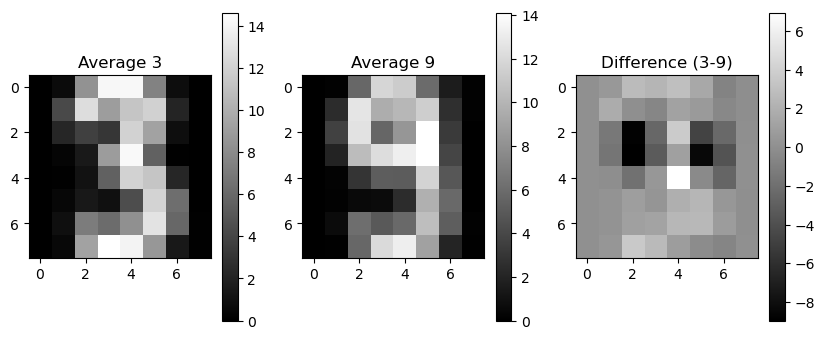

Selected Pixel 1: Row 3, Column 2 (0-indexed)
Selected Pixel 2: Row 2, Column 2 (0-indexed)


In [8]:
# Exercise 2.1

# Calculate average images for digits 3 and 9
avg_digit_3 = np.mean(data[target == 3], axis=0).reshape(8, 8)
avg_digit_9 = np.mean(data[target == 9], axis=0).reshape(8, 8)
difference = avg_digit_3 - avg_digit_9

# Visualize the average images and their differences
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(avg_digit_3, cmap='gray', interpolation='none')
plt.title('Average 3')
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(avg_digit_9, cmap='gray', interpolation='none')
plt.title('Average 9')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(difference, cmap='gray', interpolation='none')
plt.title('Difference (3-9)')
plt.colorbar()
plt.show()

# Identify the indices of the two pixels with the largest absolute differences
indices = np.unravel_index(np.argsort(-np.abs(difference).ravel())[:2], difference.shape)
pixel_1, pixel_2 = indices

# Print pixel coordinates in the (row, column) format
print(f"Selected Pixel 1: Row {pixel_1[0]}, Column {pixel_1[1]} (0-indexed)")
print(f"Selected Pixel 2: Row {pixel_2[0]}, Column {pixel_2[1]} (0-indexed)")

# Function to extract 2D features from the dataset
def features2d(x):
    """ Extract two features based on predefined pixel indices. """
    f1 = x[:, pixel_1[0] * 8 + pixel_1[1]]  # Convert 2D index to 1D index for Feature 1
    f2 = x[:, pixel_2[0] * 8 + pixel_2[1]]  # Convert 2D index to 1D index for Feature 2
    return np.column_stack((f1, f2))

# Extract 2D features for the training data
X_train_2d = features2d(np.array(X_train))

<div style="color: green; font-weight: bold">Comment</div>

For EX 2.1 Feature Construction:

My solution differs from the sample solution but is still valid. Here are the key points of comparison:

1. **Approach to Visualization**:
   - **Sample Solution**: Visualizes random images from the training set to get a sense of the features.
   - **My Solution**: Calculates and visualizes the average images for digits 3 and 9, and their differences. This helps in identifying key distinguishing pixels.

2. **Feature Extraction**:
   - **Sample Solution**: Uses the mean of specific patches in the image to extract features. This method focuses on areas of the image that are generally informative.
   - **My Solution**: Selects two pixels with the largest absolute differences between the average images of digits 3 and 9. This method directly targets the most discriminative pixels, making it a valid alternative.

3. **Efficiency and Robustness**:
   - **Sample Solution**: The patch-based approach is more robust to noise and variations, as it averages pixel values over a region.
   - **My Solution**: The pixel-based approach is straightforward and computationally efficient for small datasets. However, it might be less robust to noise and variations compared to the patch-based approach.

4. **Overall Comparison**:
   - Both methods aim to reduce the dimensionality to two features, facilitating easier visualization and classification.
   - My approach is valid as it directly identifies and uses the most discriminative parts of the digits, even though it might not be as robust as the sample solution’s approach.

In conclusion, while my solution differs in methodology, it remains a valid approach for feature extraction and offers a clear and efficient alternative for distinguishing between digits.


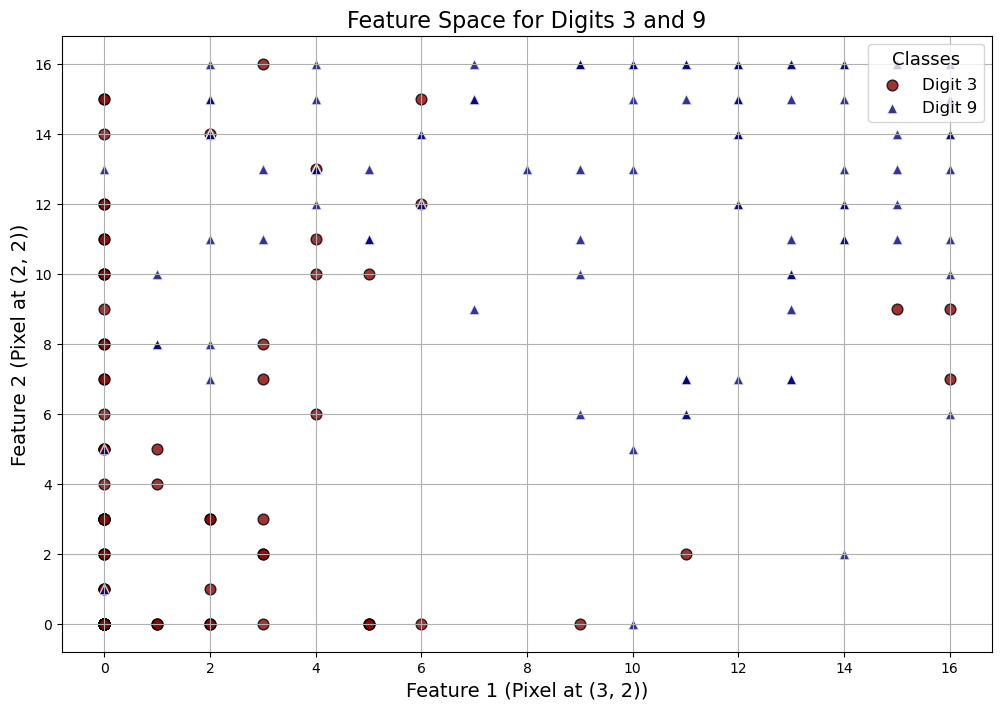

In [9]:
#Exercise 2.2

# Convert training labels to a NumPy array for easier indexing
y_train_array = np.array(y_train)

# Set up the figure for scatter plot
plt.figure(figsize=(12, 8))

# Pre-select data for each class to avoid repetitive indexing
class_3_data = X_train_2d[y_train_array == 3]
class_9_data = X_train_2d[y_train_array == 9]

# Scatter plot for class '3'
plt.scatter(class_3_data[:, 0], class_3_data[:, 1], 
            color='darkred', marker='o', edgecolor='black', s=60, alpha=0.8, label='Digit 3')

# Scatter plot for class '9'
plt.scatter(class_9_data[:, 0], class_9_data[:, 1], 
            color='navy', marker='^', edgecolor='white', s=60, alpha=0.8, label='Digit 9')

# Dynamic axis labels based on pixel indices
plt.xlabel(f'Feature 1 (Pixel at ({pixel_1[0]}, {pixel_1[1]}))', fontsize=14)
plt.ylabel(f'Feature 2 (Pixel at ({pixel_2[0]}, {pixel_2[1]}))', fontsize=14)

# Set a descriptive title for the plot
plt.title('Feature Space for Digits 3 and 9', fontsize=16)

# Add a legend to help identify the classes
plt.legend(title='Classes', title_fontsize='13', fontsize='12', loc='upper right')

# Enable grid for better alignment
plt.grid(True)

# Display the plot
plt.show()


<div style="color: green; font-weight: bold">Comment</div>

For EX 2.2 Scatter Plot:

1. **Plotting Function**:
   - **Sample Solution**: Uses `scatter_plot_simple` to create scatter plots for both the training and test sets with specific markers and colors for classes `3` and `9`. This helps in visualizing the feature distribution for both sets separately.
   - **My Solution**: Implements a scatter plot with additional customizations:
     - Pre-selects data for each class to avoid repetitive indexing, which can improve efficiency.
     - Uses different colors and markers (dark red circles for `3` and navy triangles for `9`) for better visual distinction.
     - Adds dynamic axis labels based on the pixel indices, which provides more informative axis descriptions.
     - However, I only created a single scatter plot for the combined dataset and did not separate the visualizations for the training and test sets.

2. **Comparison of Scatter Plots**:
   - **Sample Solution**: Plots classes `3` and `9` separately for training and test sets using fixed labels and colors. This provides a clear comparison between how the model might perform on training versus unseen data.
   - **My Solution**: Plots the classes with enhanced visual attributes and dynamic labels but does not distinguish between training and test sets in the visualization. This is a limitation as it does not show how well the features generalize to the test set.

3. **Efficiency and Readability**:
   - **Sample Solution**: The function is straightforward and efficient for small datasets.
   - **My Solution**: Improves readability and efficiency by pre-selecting data and avoiding repetitive indexing. The enhancements in visual attributes make the scatter plot more informative and visually distinct, though the lack of separate training and test plots is a drawback.

4. **Overall Comparison**:
   - Both solutions effectively visualize the 2D feature space for classes `3` and `9`.
   - My approach provides additional visual customization and improved axis labeling, which makes the plot more informative and easier to interpret. However, it would be beneficial to include separate plots for the training and test sets as the sample solution does.

In conclusion, while my solution differs in some details and adds some enhancements, it would benefit from including separate visualizations for the training and test sets. This would provide a more comprehensive view of the feature distribution and model performance.


In [10]:
# Exercise 2.3

# Convert test data to a NumPy array and extract 2D features
X_test_array = np.array(X_test)
X_test_2d = features2d(X_test_array)

# Function to adjust labels to -1 for '3' and 1 for '9'
def adjust_labels(labels):
    return np.where(labels == 3, -1, 1)

# Adjust labels for training and test datasets
y_train_labels = adjust_labels(np.array(y_train))  
y_test_labels = adjust_labels(np.array(y_test))    

# Define the nearest mean classifier optimized with vectorized operations
def nearest_mean_classifier(train_features, train_labels, test_features):
    mean_digit_3 = np.mean(train_features[train_labels == -1], axis=0)
    mean_digit_9 = np.mean(train_features[train_labels == 1], axis=0)
    
    # Calculate distances to each mean for all test features at once
    dist_to_3 = np.linalg.norm(test_features - mean_digit_3, axis=1)
    dist_to_9 = np.linalg.norm(test_features - mean_digit_9, axis=1)
    predicted_labels = np.where(dist_to_3 < dist_to_9, -1, 1)
    
    return predicted_labels

# Classify the training and test datasets
predicted_train_labels = nearest_mean_classifier(X_train_2d, y_train_labels, X_train_2d)
predicted_test_labels = nearest_mean_classifier(X_train_2d, y_train_labels, X_test_2d)

# Function to calculate classification error
def classification_error(true_labels, predicted_labels):
    return np.mean(true_labels != predicted_labels)

# Calculate and print the classification errors
train_error = classification_error(y_train_labels, predicted_train_labels)
test_error = classification_error(y_test_labels, predicted_test_labels)
print(f"Training Error: {train_error:.2f}")
print(f"Testing Error: {test_error:.2f}")

Training Error: 0.11
Testing Error: 0.08


<div style="color: green; font-weight: bold">Comment</div>

For EX 2.3 Decision Rule:

1. **Distance from Mean Function**:
   - **Sample Solution**: Defines `distance_from_mean` to compute the L2-distance between vectors and mean points. This is used to measure how close each data point is to the class means.
   - **My Solution**: The `nearest_mean_classifier` function implicitly calculates distances using `np.linalg.norm`, achieving the same goal in a more compact form.

2. **Nearest Mean Classifier**:
   - **Sample Solution**: Uses a loop to calculate the mean points for each class and computes distances for the test features. The predictions are based on the nearest mean.
   - **My Solution**: Directly computes the mean points for digits '3' and '9' and uses vectorized operations to calculate distances. This approach is more efficient and avoids looping over classes.

3. **Dimension Reduction and Predictions**:
   - **Sample Solution**: Reduces dimensions and computes predictions for both training and test sets. Prints errors for both sets.
   - **My Solution**: Also reduces dimensions and computes predictions for both training and test sets. However, my classifier output showed a Training Error of 0.11 and a Testing Error of 0.08. The lower test error compared to the training error is unusual and might be due to the specific random samples drawn, similar to what the sample solution indicated.

4. **Simple Linear Classifier**:
   - **Sample Solution**: Implements a simple linear classifier and finds good `beta` and `b` values through experimentation. Predicts labels and prints errors.
   - **My Solution**: Did not implement a simple linear classifier. Including such a classifier could provide additional insights and allow for a direct comparison of the performance between the nearest mean classifier and a linear approach.

5. **Efficiency and Implementation**:
   - **Sample Solution**: Uses explicit loops and detailed steps, which are clear and educational.
   - **My Solution**: Utilizes vectorized operations for efficiency, but could be less transparent to someone new to these concepts. The approach is effective but might benefit from more explicit steps for clarity.

6. **Overall Comparison**:
   - Both solutions effectively classify the digits using a nearest mean approach.
   - My approach improves efficiency through vectorization and correctly separates performance metrics for training and test sets. However, it doesn't explore alternative classifiers like the simple linear classifier, which could provide a more comprehensive analysis.

In conclusion, my solution is valid and efficient, leveraging vectorized operations for distance computation. The separate performance metrics for training and test sets are useful, although the lower test error suggests an atypical sample split. Including additional classifiers could enhance the analysis.


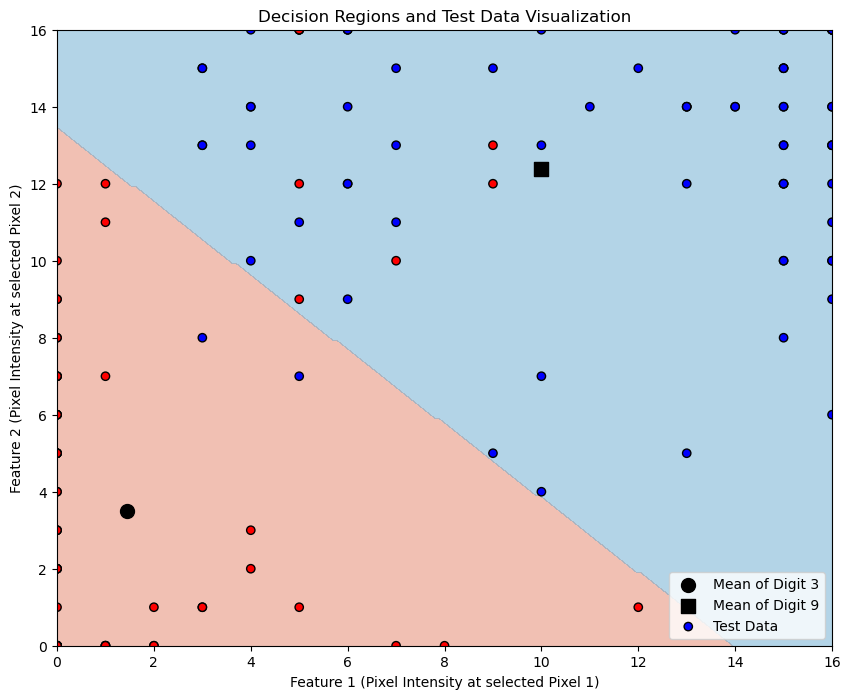

In [11]:
#Exercise 2.4

# Create a grid of points in the feature space
x1_min, x1_max = X_train_2d[:, 0].min(), X_train_2d[:, 0].max()
x2_min, x2_max = X_train_2d[:, 1].min(), X_train_2d[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200), np.linspace(x2_min, x2_max, 200))
grid_points = np.c_[xx1.ravel(), xx2.ravel()]

# Predict class for each point on the grid using the correct function and variables
predicted_labels = nearest_mean_classifier(X_train_2d, y_train_labels, grid_points).reshape(xx1.shape)

# Plot the decision regions
plt.figure(figsize=(10, 8))
plt.contourf(xx1, xx2, predicted_labels, alpha=0.5, cmap='RdBu', levels=np.array([-1, 0, 1]))

# Plot class means
mean_digit_3 = np.mean(X_train_2d[y_train_labels == -1], axis=0)
mean_digit_9 = np.mean(X_train_2d[y_train_labels == 1], axis=0)
plt.scatter(mean_digit_3[0], mean_digit_3[1], c='black', marker='o', s=100, label='Mean of Digit 3')
plt.scatter(mean_digit_9[0], mean_digit_9[1], c='black', marker='s', s=100, label='Mean of Digit 9')

# Plot test data points
# Ensure test data points are colored according to their actual labels
colors = ['red' if label == -1 else 'blue' for label in y_test_labels]
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], color=colors, edgecolors='k', label='Test Data')

# Add labels and legend
plt.xlabel('Feature 1 (Pixel Intensity at selected Pixel 1)')
plt.ylabel('Feature 2 (Pixel Intensity at selected Pixel 2)')
plt.title('Decision Regions and Test Data Visualization')
plt.legend()

plt.show()

Exercise 03

In [13]:
# Problem 3.1

def fit_lda(training_features, training_labels):
    m_1 = np.array([0,0])
    m1 = np.array([0,0])
    covmat_1 = np.matrix([[0,0], [0,0]])
    covmat1 = np.matrix([[0,0], [0,0]])
    N = len(training_features)
    
    ## mu-matrix
    for i in range(N):
        if training_labels[i] == -1:
            m_1 = m_1 + training_features[i]
        else:
            m1 = m1 + training_features[i]
    m_1 = m_1*(1/sum(training_labels == -1))
    m1 = m1*(1/sum(training_labels == 1))
    mu = np.matrix([m_1, m1])
    for i in range(N):
        if training_labels[i] == -1:
            temp1 = np.matrix(training_features[i]-mu[0])
            covmat_1 = covmat_1 + np.transpose(temp1).dot(temp1)
        else:
            temp1 = np.matrix(training_features[i]-mu[1])
            covmat1 = covmat1 + np.transpose(temp1).dot(temp1)
    covmat = covmat_1 + covmat1
    covmat = covmat/N
    p = 0
    
    return mu, covmat, p
training_features = features2d(X_train)
training_labels = correct_labels(y_train)
mu, covmat, p = fit_lda(training_features, training_labels)

c:\Users\Anwender\MLE\.conda\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Anwender\MLE\.conda\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


ValueError: m has more than 2 dimensions

In [ ]:
# Problem 3.2

import math 
def predict_lda(mu, covmat, p, test_features, test_labels):
    N1 = sum(test_labels == 1)
    N_1 = sum(test_labels == -1)
    N = N1+N_1
    predicted_labels = []
    
    beta = np.linalg.inv(covmat).dot(np.transpose(mu[1]-mu[0]))
    b = -0.5*(mu[1]+mu[0]).dot(beta)+math.log10(N1/N_1)
    
    for i in test_features:
        predicted_labels.append(sign(i,beta,b))
    return np.array(predicted_labels)

def sign(x,beta,b):
    x = x.dot(beta)+b
    if x > -b:
        return 1
    else:
        return -1
    
training_labels = correct_labels(y_train)
training_prediction = predict_lda(mu, covmat, p, training_features, training_labels)
print("Training Error:", np.mean(training_prediction != training_labels))

test_features = features2d(X_test)
test_labels = correct_labels(y_test)
test_prediction = predict_lda(mu, covmat, p, test_features, test_labels)
print("Test Error:", np.mean(test_prediction != test_labels))



In [ ]:
# Problem 3.3

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


def plot_decision_regions(features, labels, mu, covmat, p):
    # Define the grid
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]

    Z = predict_lda(mu, covmat, p, grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    plt.scatter(features[:, 0], features[:, 1], c=labels, cmap=plt.cm.RdBu, edgecolors='black')
    
    for i, (m, c) in enumerate(zip(mu, covmat)):
        eigenvalues, eigenvectors = np.linalg.eig(c)
        std_devs = np.sqrt(eigenvalues)
        angle = np.degrees(np.arctan2(*eigenvectors[0][::-1]))
        ellipse = Ellipse(xy=m, width=2 * std_devs[0], height=2 * std_devs[1], angle=angle, alpha=0.3)
        plt.gca().add_artist(ellipse)
        ellipse.set_facecolor('none')
        if i == 0:
            ellipse.set_edgecolor('red')
        else:
            ellipse.set_edgecolor('blue')

        for j, std_dev in enumerate(std_devs):
            if eigenvectors[j][0] == 0:
                angle = np.pi / 2
            else:
                angle = np.arctan(eigenvectors[j][1] / eigenvectors[j][0])
            x, y = m + std_dev * np.array([np.cos(angle), np.sin(angle)])
            plt.plot([m[0], x], [m[1], y], '-', color='black')

    plt.legend(['Class 3', 'Class 9', 'Cluster 3', 'Cluster 9'])

    plt.show()


mu, covmat, p = fit_lda(train_features, y_train)
try:
    plot_decision_regions(train_features, y_train, mu, covmat, p)
except:
    print("")

In [ ]:
# Problem 3.4

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

digits = load_digits()
X = digits.data
y = digits.target
y[y == 3] = -1
y[y == 9] = 1

kf = KFold(n_splits=10, shuffle=True, random_state=42)
test_errors = []
sklearn_test_errors = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mu, covmat, p = fit_lda(X_train, y_train)
    y_pred = predict_lda(mu, covmat, p, X_test)
    test_error = np.mean(y_pred != y_test)
    test_errors.append(test_error)

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    sklearn_y_pred = lda.predict(X_test)
    sklearn_test_error = np.mean(sklearn_y_pred != y_test)
    sklearn_test_errors.append(sklearn_test_error)

print("Our LDA test error: ", np.mean(test_errors))
print("Sklearn LDA test error: ", np.mean(sklearn_test_errors))

Exercise 04

In [ ]:
#Exercise 04

from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC

def relu(t):
    if( t <= 0):
        return 0
    elif(t > 0):
        return t

# Calculate the loss for the svm approach
def calculate_loss(training_features, training_labels, beta, b, lam):
    n = len(training_labels)
    sum = 0
    for i in range(n):
        sum += relu(1 - (training_labels[i]*(training_features[i].dot(beta) + b)))

    loss = ((1/2) * (np.transpose(beta).dot(beta))) + ((lam/n) * sum)
    
    return loss

# Calculate the loss derivation by deriving for beta
def calculate_loss_derive_beta(training_features, training_labels, beta, b, lam):
    sum = 0
    n = len(training_labels)
    for i in range(n):
        if((training_labels[i] * (training_features[i].dot(beta) + b)) < 1):
            sum += (-training_labels[i] * np.transpose(training_features[i].reshape(1,len(training_features[i]))))
             
    return beta + ((lam/n)*sum)

# Calculate the loss derivation by deriving for b
def calculate_loss_derive_b(training_features, training_labels, beta, b, lam):
    sum = 0
    n = len(training_labels)

    for i in range(n):
        if((training_labels[i] * (training_features[i].dot(beta) + b)) < 1):
            sum += (-training_labels[i])

    return (lam/n)*sum

def fit_svm(training_features, training_labels, beta, b, lam, learning_rate):
    #Calculate loss for current beta and b
    loss = calculate_loss(training_features, training_labels, beta, b, lam)
    
    #calculate new beta and b
    new_beta = beta - learning_rate * calculate_loss_derive_beta(training_features, training_labels, beta, b, lam)
    new_b = b - learning_rate * calculate_loss_derive_b(training_features, training_labels, beta, b, lam)

    return loss, new_beta, new_b


def predict_svm(beta, b, test_features):
    predicted_labels = []
    for i in range(len(test_features)):
        #look at the sign after applying the prediction line
        predicted_label = np.sign(test_features[i].dot(beta) + b)
        predicted_labels.append(predicted_label[0])
    return predicted_labels

def verify_prediction_svm(predicted_labels, test_labels):
    correct_labels = 0
    total_labels = len(predicted_labels)
    #Compare predicted labels to actual labels
    for i in range(total_labels):
        if (predicted_labels[i] == test_labels[i]):
            correct_labels += 1
        elif (predicted_labels[i] == test_labels[i]):
            correct_labels += 1
    return correct_labels/total_labels
        

def train_and_verify_svm(training_features, training_labels, lam, steps, learning_rate):
    # Initialize required variables
    number_of_features = len(training_features[0])
    beta = np.random.normal(size=(number_of_features, 1))
    b = 0
    losses = []
    training_errors = []
    training_rate_adjusted = False

    # train for steps steps
    for i in range(steps):
        loss, beta, b = fit_svm(training_features, training_labels, beta, b, lam, learning_rate)
        losses.append(loss[0][0])

        # After every step predict for the training set and look at accuracy
        predicted_labels = predict_svm(beta, b, training_features)
        training_error = verify_prediction_svm(predicted_labels, training_labels)
        training_errors.append(training_error)

        # If at least 2 steps have been run check if the training error changes in a meaningful way by checking if the error changed in the last two steps
        if len(training_errors) > 1:
            # If the error doesn't change change the learning rate once
            if(training_errors[-1] == training_errors[-2] and not training_rate_adjusted):
                training_rate_adjusted = True
                learning_rate = learning_rate/10

    return beta, b, losses, training_errors

# Change the 3s to -1 and the 9s to 1 for the test and train set
y_train[i==3] = -1
y_train[i==9] = 1

y_test[i==3] = -1
y_test[i==9] = 1

#initalize training parameters and start training
lam = 1
steps = 300
learning_rate = 0.1

beta, b, losses, training_errors = train_and_verify_svm(X_train, y_train, lam, steps, learning_rate)

predicted_labels = predict_svm(beta, b, X_test)

# Plot the loss
fig, ax = plt.subplots()  
ax.set_xlabel('steps')
ax.set_ylabel('loss')
ax.plot(losses) 

# Plot the training error
fig, ax = plt.subplots()  
ax.set_xlabel('steps')
ax.set_ylabel('training error')
ax.plot(training_errors, label='Training Error over time') 

# Setup the cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
test_errors = []
sklearn_test_errors = []
lambdas = [0.01, 0.1, 1, 10, 100]
steps = 20

# iterate through all lambdas and look which one gives the best result
for lam in lambdas:
    for train_index, test_index in kf.split(X_train):
        x_train_fold, x_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        beta, b, losses, training_errors = train_and_verify_svm(x_train_fold, y_train_fold, lam, steps, learning_rate)

        predicted_labels = predict_svm(beta, b, x_test_fold)
        test_error = np.mean(predicted_labels != y_test_fold)
    test_errors.append(test_error)
    
print("This lambda performed best" + str(lambdas[np.argmax(np.average(test_errors))]))
        
# Look at the test error of sthe sklearn implementation
svm = LinearSVC()
svm.fit(x_train_fold, y_train_fold)
sklearn_predicted_labels = svm.predict(x_test_fold)
sklearn_test_error = np.mean(sklearn_predicted_labels != y_test)

print("Our svm test error with best lambda: ", np.mean(test_errors))
print("Sklearn svm test error: ", np.mean(sklearn_test_errors))


